<a href="https://colab.research.google.com/github/100rab-S/Tensorflow-Developer-Certificate/blob/main/Course_3_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2021-04-23 13:10:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.217.15.112, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-04-23 13:10:00 (132 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [10]:
model = Sequential()
model.add(Embedding(total_words, 120, input_length=max_sequence_len-1))
model.add(Bidirectional( LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(512, activation = 'relu', kernel_regularizer=regularizers.L2()))
model.add(Dense(total_words, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 120)           385320    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 10, 256)           254976    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                82176     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               33280     
_________________________________________________________________
dense_11 (Dense)             (None, 3211)              1647243   
Total params: 2,402,995
Trainable params: 2,402,995
Non-trainable params: 0
____________________________________________

In [11]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 40s 12ms/step - loss: 7.3240 - accuracy: 0.0205
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4802 - accuracy: 0.0211
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 6.3950 - accuracy: 0.0230
Epoch 4/100
484/484 [==============================] - 6s 11ms/step - loss: 6.3131 - accuracy: 0.0265
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1792 - accuracy: 0.0318
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1566 - accuracy: 0.0340
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 6.0904 - accuracy: 0.0390
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 6.0262 - accuracy: 0.0402
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 5.9450 - accuracy: 0.0394
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss: 5.89

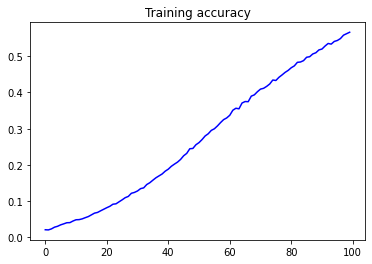

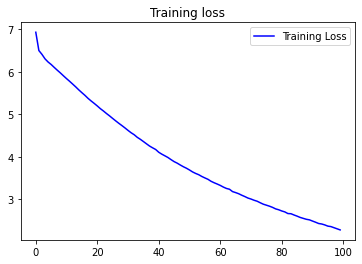

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [13]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope the world doth go away or eyes remain come end stay such bold your breast doth bear thee hearts did best sang find confounds deceased i see memory grow night up every dear state is the same imprint will die did stand still still thee thee me say thee for thine annoy blind hung in thee thee me forbid me hold thee for for thee new none desire for thee grown torn increase seen silent doting best doth youth for crime thee heart for thee night dost seen lie so it doth sing that her desire thee forth for dead
